In this project, we want to answer following questions

- In which year did the most helicopter prison break attempts occur?

- In which countries do the most attempted helicopter prison breaks occur?

- In which countries do helicopter prison breaks have a higher chance of success?

In [2]:
from helper import *
url = 'https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes'
data = data_from_url(url)
data

[['August 19, 1971',
  'Santa Martha Acatitla',
  'Mexico',
  'Yes',
  'Joel David Kaplan Carlos Antonio Contreras Castro',
  "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.DataFrame(data, columns = ['Date', 'Prison name', 'Country', 'Succeeded', 'Escapee(s)', 'Details'])
data.head()

,Date,Prison name,Country,Succeeded,Escapee(s),Details
0,1971-08-19,Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro,Joel David Kaplan was a New York businessman w...
1,1973-10-31,Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus TwomeyKevin Mallon,"On October 31, 1973, an IRA member hijacked a ..."
2,1978-05-24,"United States Penitentiary, Marion",United States,No,Garrett Brock TrapnellMartin Joseph McNallyJam...,43-year-old Barbara Ann Oswald hijacked a Sain...
3,1981-02-27,"Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard DupréDaniel Beaumont,"With the help of Serge Coutel, Gérard Dupré an..."
4,1981-05-07,"Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker)Giles Arseneault (pris...,Marina Paquet held a sawed-off shotgun against...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         48 non-null     object
 1   Prison name  48 non-null     object
 2   Country      48 non-null     object
 3   Succeeded    48 non-null     object
 4   Escapee(s)   48 non-null     object
 5   Details      48 non-null     object
dtypes: object(6)
memory usage: 2.4+ KB


In [6]:
print('The number of rows is: ', data.shape[0])
print('The number of columns is: ', data.shape[1])
print('There is no null values')

The number of rows is:  48
The number of columns is:  6
There is no null values


In [7]:
data.columns

Index(['Date', 'Prison name', 'Country', 'Succeeded', 'Escapee(s)', 'Details'], dtype='object')

In [9]:
data['Date'] = pd.to_datetime(data['Date'])

In [38]:
data['year'] = data['Date'].dt.year

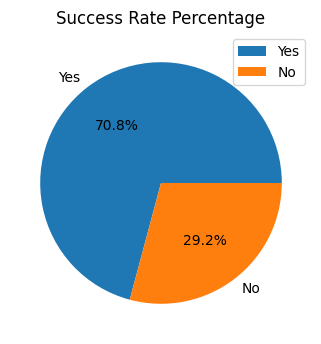

In [44]:
plt.pie(data['Succeeded'].value_counts(), labels=data['Succeeded'].value_counts().index, 
        autopct='%1.1f%%')
plt.legend()
plt.title('Success Rate Percentage')
plt.show()

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         48 non-null     datetime64[ns]
 1   Prison name  48 non-null     object        
 2   Country      48 non-null     object        
 3   Succeeded    48 non-null     object        
 4   Escapee(s)   48 non-null     object        
 5   Details      48 non-null     object        
 6   year         48 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 2.8+ KB


<BarContainer object of 48 artists>

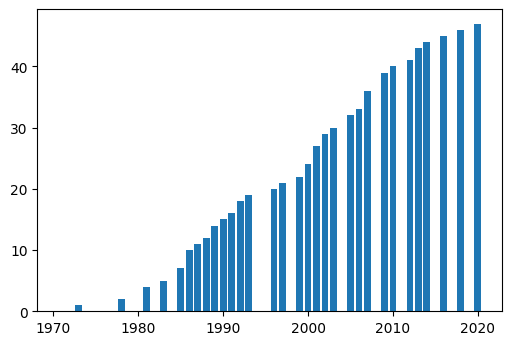

In [50]:
plt.bar(data['year'], data['year'].index)

In [53]:
succeeded = data[data['Succeeded'] == 'Yes']
not_succeeded = data[data['Succeeded'] == 'No']

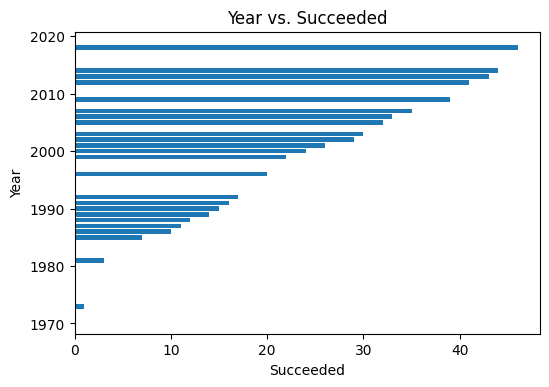

In [69]:
plt.barh(succeeded['year'], succeeded['year'].index)
plt.title('Year vs. Succeeded')
plt.xlabel('Succeeded')
plt.ylabel('Year')
plt.show()

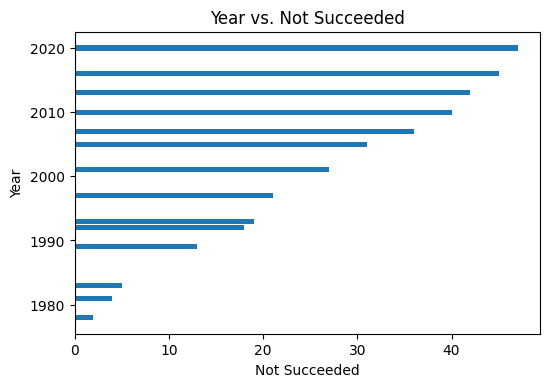

In [67]:
plt.barh(not_succeeded['year'], not_succeeded['year'].index)
plt.title('Year vs. Not Succeeded')
plt.xlabel('Not Succeeded')
plt.ylabel('Year')
plt.show()

In [72]:
data['year'].value_counts().head()

1986    3
2001    3
2007    3
2009    3
1985    2
Name: year, dtype: int64

In [73]:
data['Country'].value_counts()

France            15
United States      8
Belgium            4
Canada             4
Greece             4
Brazil             2
United Kingdom     2
Australia          2
Mexico             1
Puerto Rico        1
Russia             1
Netherlands        1
Ireland            1
Italy              1
Chile              1
Name: Country, dtype: int64

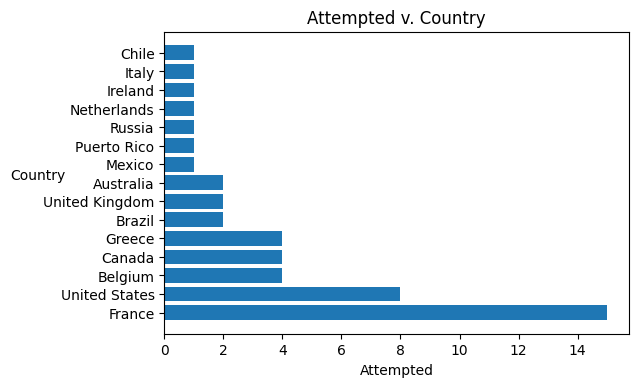

In [81]:
plt.barh(data['Country'].value_counts().index, data['Country'].value_counts())
plt.title('Attempted v. Country')
plt.xlabel('Attempted')
plt.ylabel('Country', rotation=360)
plt.show()

In [87]:
se = data[data['Succeeded'] == 'Yes']
se.Country.value_counts()

France            11
United States      6
Canada             3
Belgium            2
Brazil             2
Greece             2
Ireland            1
Puerto Rico        1
Russia             1
Italy              1
United Kingdom     1
Mexico             1
Australia          1
Chile              1
Name: Country, dtype: int64

In which year did the most helicopter prison break attempts occur?
- 1986, 2001, 2007, 2009

In which countries do the most attempted helicopter prison breaks occur?
- France and United States

In which countries do helicopter prison breaks have a higher chance of success?
- Also France and United States